<a href="https://colab.research.google.com/github/11kartheek/object-detection/blob/main/yolov9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [4]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 17.47 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 49.9 MB/s eta 0:00:00


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [6]:
!pip install -q roboflow

## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [7]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 Jun 27 09:17 .
drwxr-xr-x 1 root root      4096 Jun 27 09:17 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data

**NOTE:** If you want to run inference using your own file as input, simply upload image to Google Colab and update `SOURCE_IMAGE_PATH` with the path leading to your file.

In [8]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [9]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

## Detection with pre-trained COCO model

### gelan-c

In [10]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device cpu --no

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 1378.7ms
Speed: 2.3ms pre-process, 1378.7ms inference, 31.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

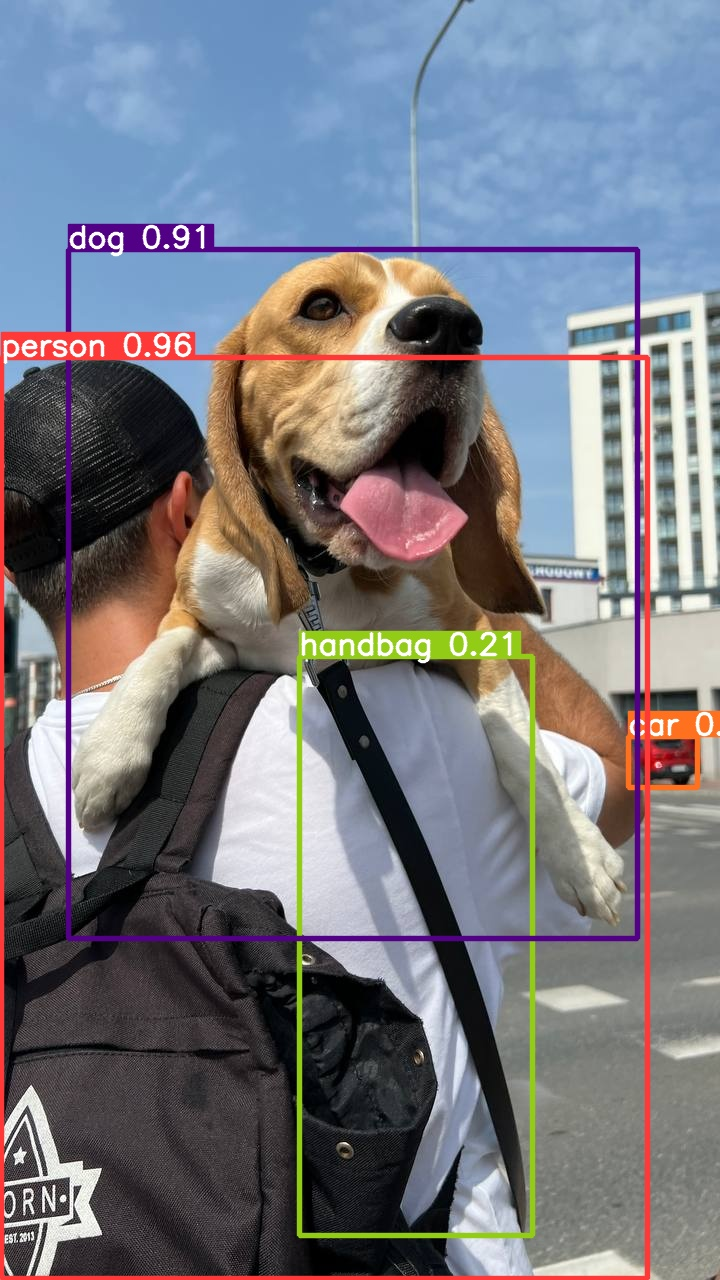

In [11]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

## yolov9-e

In [14]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device cpu

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 3998.6ms
Speed: 6.3ms pre-process, 3998.6ms inference, 5.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


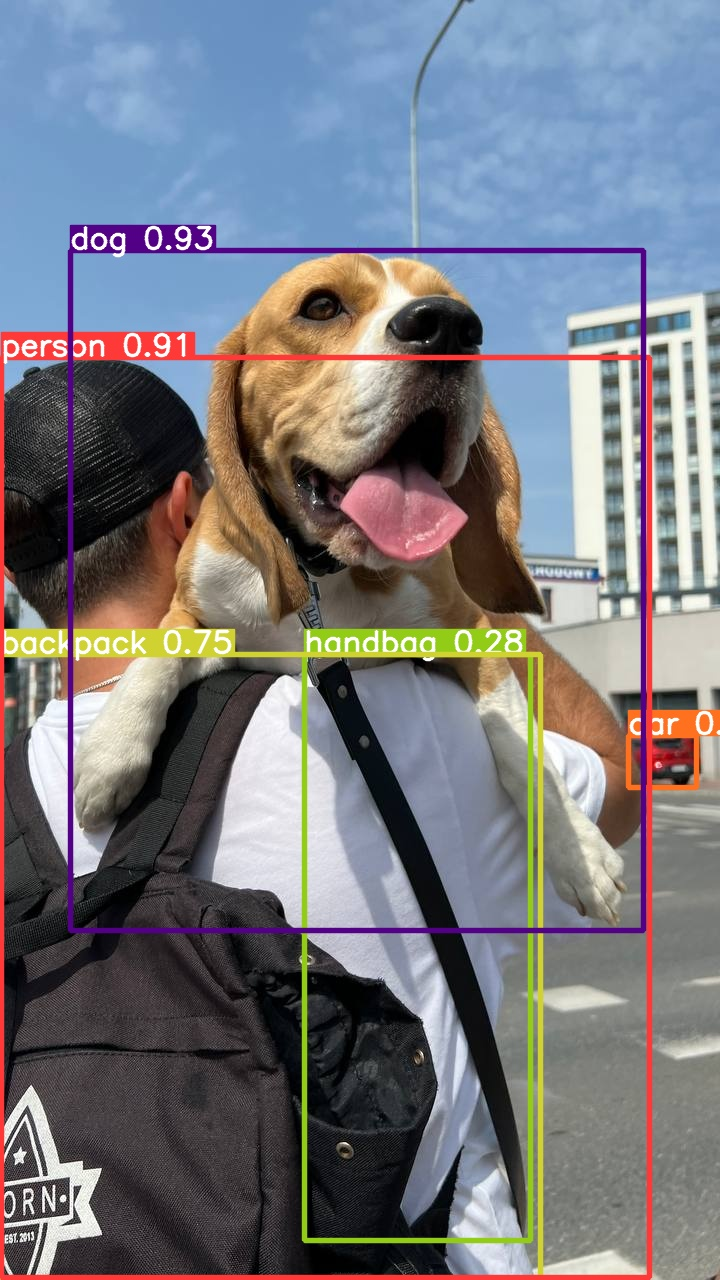

In [17]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp3/dog.jpeg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [18]:
%cd {HOME}/yolov9

/content/yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [19]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(8)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-8 in yolov9:: 100%|██████████| 522/522 [00:00<00:00, 2084.01it/s]


## Train Custom Model

In [20]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 2 --img 640 --device cpu --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-06-27 09:38:22.608998: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 09:38:22.609082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 09:38:22.766186: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-27 09:38:23.055194: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 09:38:26.994751: W tensorf

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [21]:
!ls {HOME}/yolov9/runs/train/exp/

events.out.tfevents.1719481109.553bac1edce2.5795.0  labels_correlogram.jpg  opt.yaml
hyp.yaml					    labels.jpg		    weights


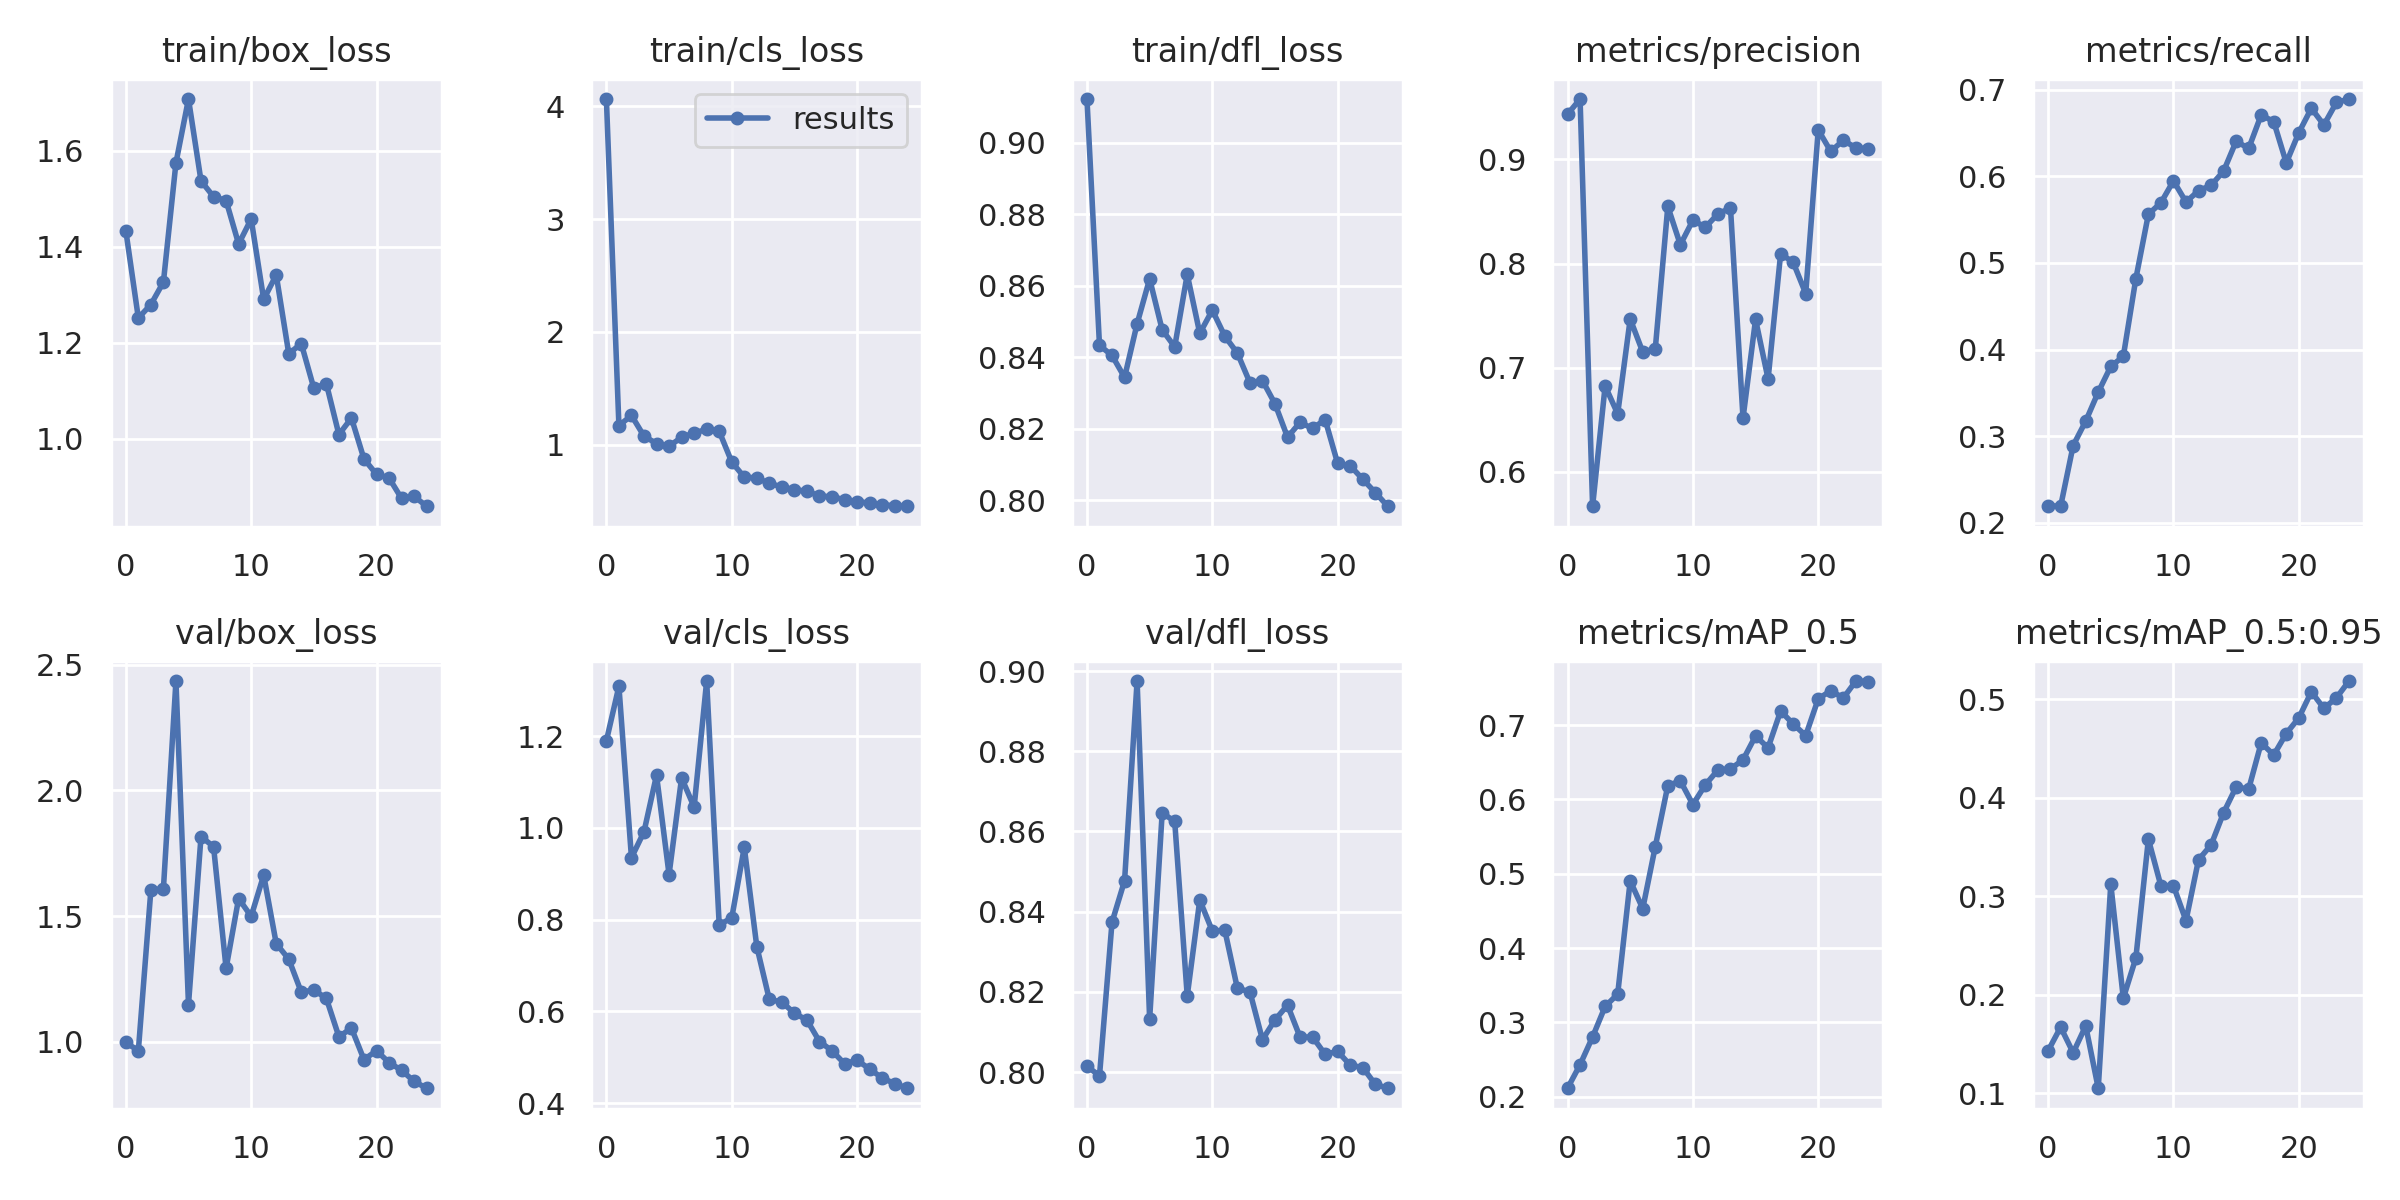

In [18]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

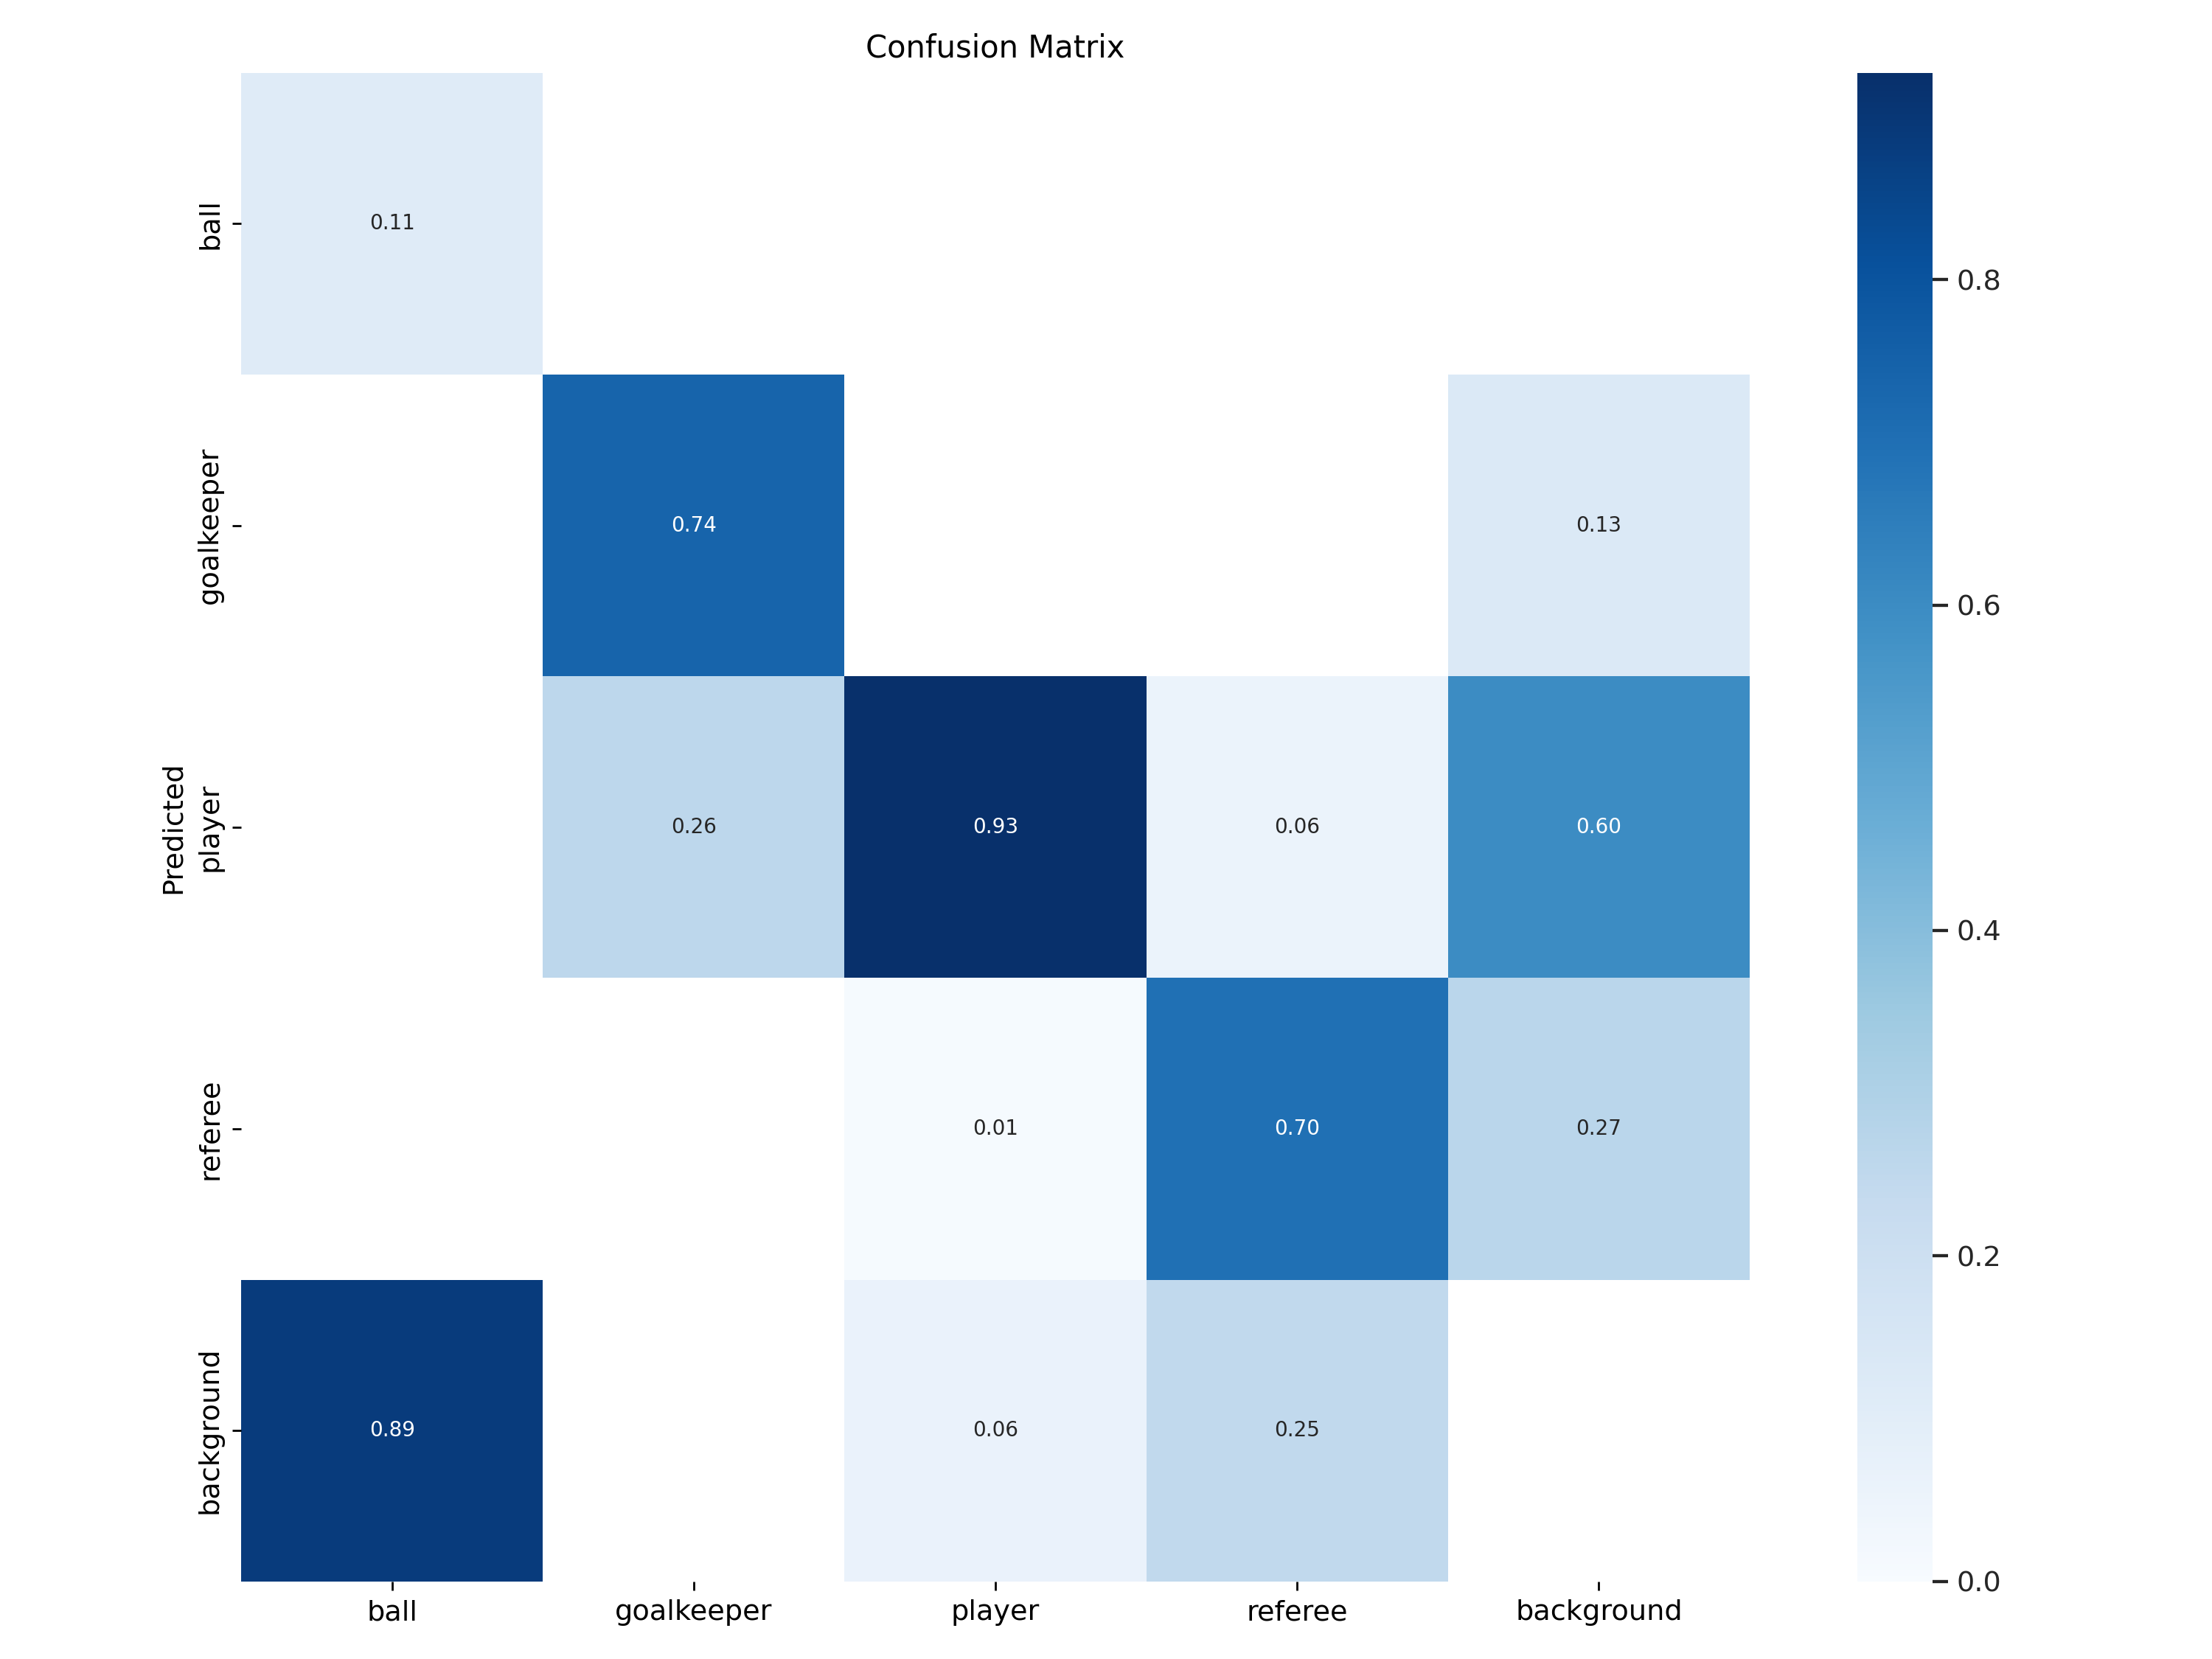

In [19]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

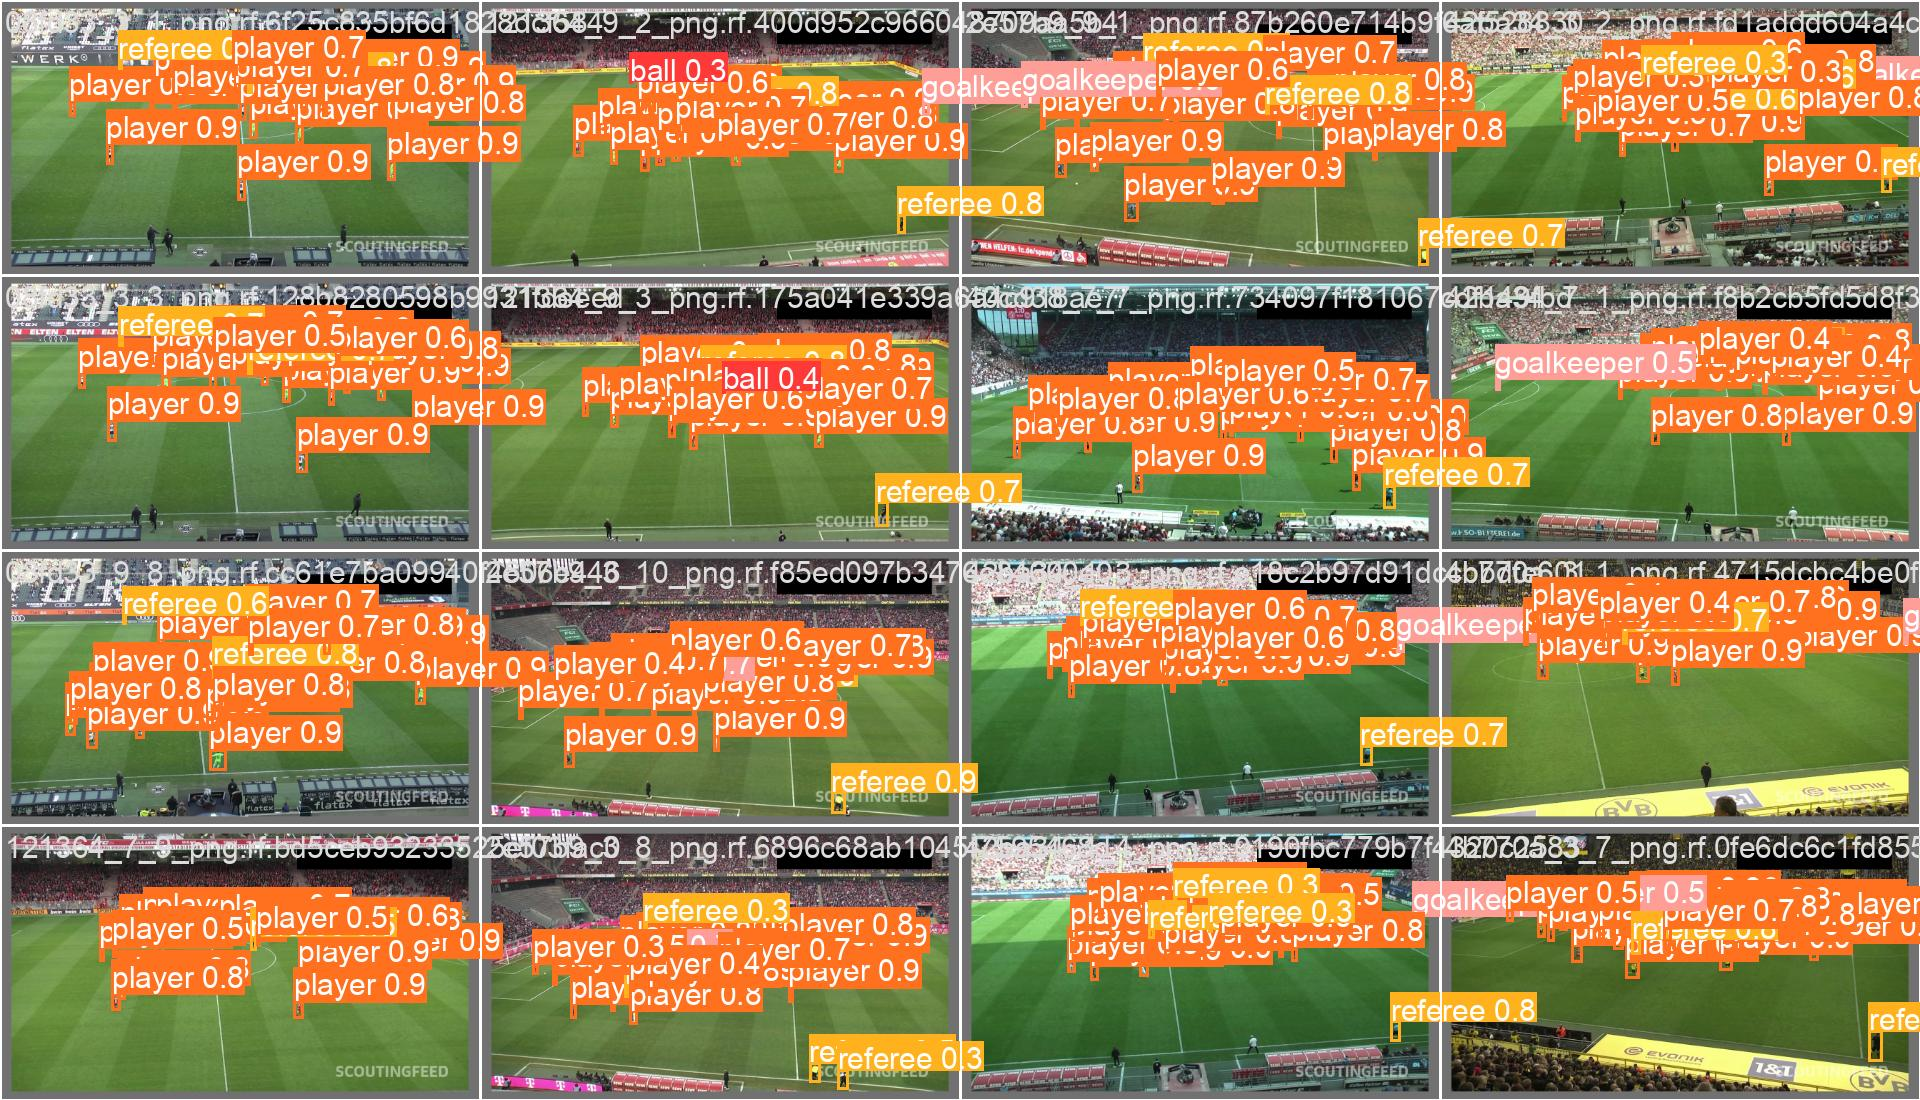

In [20]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [21]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/football-players-detection-8/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/football-players-detection-8/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:04<00:00,  2.37s/it]
                   all         38        905       0.91      0.689      0.759      0.528
                  ball     

## Inference with Custom Model

In [23]:
!python detect.py \
--img 1280 --conf 0.1 --device cpu \
--weights {HOME}/weights/yolov9-e.pt \
--source {dataset.location}/test/images

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/yolov9/football-players-detection-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/13 /content/yolov9/football-players-detection-8/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 736x1280 27 persons, 2 sports balls, 1 tennis racket, 1 chair, 16441.6ms
image 2/13 /content/yolov9/football-players-detection-8/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 736x1280 36 perso

Save model to huggingface spaces app

In [63]:
from huggingface_hub import HfApi
api = HfApi()

In [64]:
from huggingface_hub import login
login()

In [73]:

api.upload_file(
    path_or_fileobj='/content/weights/yolov9-e.pt',
    path_in_repo="base.pt",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

yolov9-e.pt:   0%|          | 0.00/140M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/c5ba983941e8f71d6769fd5267b8ee65798baebd', commit_message='Upload base.pt with huggingface_hub', commit_description='', oid='c5ba983941e8f71d6769fd5267b8ee65798baebd', pr_url=None, pr_revision=None, pr_num=None)

In [65]:

api.upload_file(
    path_or_fileobj="/content/yolov9/runs/train/exp/weights/best.pt",
    path_in_repo="best.pt",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

ValueError: Provided path: '/content/yolov9/runs/train/exp/weights/best.pt' is not a file on the local file system

In [31]:
api.upload_folder(
    folder_path="/content/yolov9/football-players-detection-8",
    path_in_repo="data", # Upload to a specific folder
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
    ignore_patterns="**/logs/*.txt", # Ignore all text logs
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/182af5eb5179ffcfd1f3ba42e135d742cd814239', commit_message='Upload folder using huggingface_hub', commit_description='', oid='182af5eb5179ffcfd1f3ba42e135d742cd814239', pr_url=None, pr_revision=None, pr_num=None)

In [69]:
api.upload_folder(
    folder_path="/content/yolov9/models",
    path_in_repo="models", # Upload to a specific folder
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
    ignore_patterns="**/logs/*.txt", # Ignore all text logs
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/8039cd3dd67a1dce0694412b7dcb6ed656814263', commit_message='Upload folder using huggingface_hub', commit_description='', oid='8039cd3dd67a1dce0694412b7dcb6ed656814263', pr_url=None, pr_revision=None, pr_num=None)

In [66]:
api.upload_folder(
    folder_path="/content/yolov9/utils",
    path_in_repo="utils", # Upload to a specific folder
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
    ignore_patterns="**/logs/*.txt", # Ignore all text logs
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/8da0dd19683053ee2f77d158a707c4cd258196f5', commit_message='Upload folder using huggingface_hub', commit_description='', oid='8da0dd19683053ee2f77d158a707c4cd258196f5', pr_url=None, pr_revision=None, pr_num=None)

In [32]:
api.upload_file(
    path_or_fileobj="/content/yolov9/requirements.txt",
    path_in_repo="requirements.txt",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/a529e2389416782971a31fc8da491e40a45cfceb', commit_message='Upload requirements.txt with huggingface_hub', commit_description='', oid='a529e2389416782971a31fc8da491e40a45cfceb', pr_url=None, pr_revision=None, pr_num=None)

In [68]:
api.upload_file(
    path_or_fileobj="/content/data/player.jpg",
    path_in_repo="player.jpg",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/3438c3afa16890d7515e286c18974171cb891f32', commit_message='Upload player.jpg with huggingface_hub', commit_description='', oid='3438c3afa16890d7515e286c18974171cb891f32', pr_url=None, pr_revision=None, pr_num=None)

In [67]:
api.upload_file(
    path_or_fileobj="/content/yolov9/detect.py",
    path_in_repo="detect.py",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/33dfbfb91f4c24185ee2d0f8ec50aae214d7c466', commit_message='Upload detect.py with huggingface_hub', commit_description='', oid='33dfbfb91f4c24185ee2d0f8ec50aae214d7c466', pr_url=None, pr_revision=None, pr_num=None)

In [35]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.0 MB/s 

In [71]:
import gradio as gr
import subprocess
from detect import run
def run_detection(image):
    # Save the uploaded image to a temporary file


    # Command to run the detect.py script with the specified parameters
    result = run(weights = '/content/weights/yolov9-e.pt',source = image)

    return result

iface = gr.Interface(
    fn=run_detection,
    inputs=[gr.Image(type="filepath",label="Input Image")],
    outputs="image",
    examples = ['/content/data/dog.jpeg','/content/data/player.jpg']
)

iface.launch()


In [28]:
!python detect.py \
 --device cpu \
--weights {HOME}/weights/yolov9-e.pt \
--source {HOME}/data/player.jpg


detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/player.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/data/player.jpg: 448x640 4 persons, 1 sports ball, 4859.0ms
Speed: 3.2ms pre-process, 4859.0ms inference, 2.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


In [30]:
from detect import run

In [44]:
result = run(weights = '/content/weights/yolov9-e.pt',source = '/content/data/player.jpg')

YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
